<a href="https://colab.research.google.com/github/ashikasarker/tensorflow/blob/main/src/image_classification_cifar10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!unzip "/content/drive/MyDrive/Dataset/archive (1).zip" -d "/content/cats_dogs"

Archive:  /content/drive/MyDrive/Dataset/archive (1).zip
replace /content/cats_dogs/test_set/test_set/cats/_DS_Store? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: /content/cats_dogs/test_set/test_set/cats/_DS_Store  
replace /content/cats_dogs/test_set/test_set/cats/cat.4001.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: /content/cats_dogs/test_set/test_set/cats/cat.4001.jpg  
replace /content/cats_dogs/test_set/test_set/cats/cat.4002.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: /content/cats_dogs/test_set/test_set/cats/cat.4002.jpg  
replace /content/cats_dogs/test_set/test_set/cats/cat.4003.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: 
error:  invalid response [{ENTER}]
replace /content/cats_dogs/test_set/test_set/cats/cat.4003.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: 
error:  invalid response [{ENTER}]
replace /content/cats_dogs/test_set/test_set/cats/cat.4003.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: 
error:  invalid response [{ENTER}]
replace /cont

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
print(tf.__version__)

2.19.0


In [ ]:
from tensorflow.keras.preprocessing import image_dataset_from_directory

from enum import Enum
class animals(Enum):
    AIRPLANE = 0
    CAR = 1
    BIRD = 2
    CAT = 3
    DEER = 4
    DOG = 5
    FROG = 6
    HORSE = 7
    SHIP = 8
    TRUCK = 9


train_data = image_dataset_from_directory(
    directory='/content/cats_dogs/training_set/training_set',
    labels='inferred',
    label_mode='int',
    batch_size=None,
    image_size=(32, 32)
)


test_data = image_dataset_from_directory(
    directory='/content/cats_dogs/test_set/test_set',
    labels='inferred',
    label_mode='int',
    batch_size=None,
    image_size=(32, 32)
)


Found 8005 files belonging to 2 classes.
Found 2023 files belonging to 2 classes.


In [ ]:
def dataset_to_numpy(data):
    labels = []
    images = []
    for image, label in data:
        images.append(image.numpy().astype('uint8'))
        labels.append(label.numpy())
    images = np.stack(images)
    labels = np.stack(labels).reshape(-1, 1)
    return images, labels

train_images_kaggle, train_labels_kaggle = dataset_to_numpy(train_data)
test_images_kaggle, test_labels_kaggle = dataset_to_numpy(test_data)

In [ ]:
train_labels_kaggle = np.where(train_labels_kaggle == 0, animals.CAT.value, animals.DOG.value)
test_labels_kaggle = np.where(test_labels_kaggle == 0, animals.CAT.value,  animals.DOG.value)

In [ ]:
cifar_10 =  tf.keras.datasets.cifar10
(train_images, train_labels), (test_images, test_labels) = cifar_10.load_data()
class_names = ['airplane', 'car', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']
print(train_images.shape, train_images.dtype, train_images.min(), train_images.max())

(50000, 32, 32, 3) uint8 0 255


In [ ]:
train_images = np.concatenate([train_images, train_images_kaggle], axis=0)
train_labels = np.concatenate([train_labels, train_labels_kaggle], axis=0)

test_images = np.concatenate([test_images, test_images_kaggle], axis=0)
test_labels = np.concatenate([test_labels, test_labels_kaggle], axis=0)

print("New training set:", train_images.shape, train_labels.shape)
print("New test set:", test_images.shape, test_labels.shape)

New training set: (58005, 32, 32, 3) (58005, 1)
New test set: (12023, 32, 32, 3) (12023, 1)


In [ ]:
# Flip all training images horizontally
train_images_flipped = np.array([np.fliplr(img) for img in train_images])

train_images_aug = np.concatenate([train_images, train_images_flipped])
train_labels_aug = np.concatenate([train_labels, train_labels])  # labels stay the same
print("New training set:", train_images_aug.shape, train_labels_aug.shape, train_images_aug.dtype)



New training set: (116010, 32, 32, 3) (116010, 1) uint8


In [ ]:
'''classes_to_move = [1, 3, 4, 6]
num_to_move = 100

indices_to_move = []

for labels in classes_to_move:
    cls_indices = np.where(test_labels.flatten() == labels)[0]
    selected = np.random.choice(cls_indices, num_to_move, replace=False)
    indices_to_move.extend(selected)
'''

'classes_to_move = [1, 3, 4, 6]\nnum_to_move = 100\n\nindices_to_move = []\n\nfor labels in classes_to_move:\n    cls_indices = np.where(test_labels.flatten() == labels)[0]\n    selected = np.random.choice(cls_indices, num_to_move, replace=False)\n    indices_to_move.extend(selected)\n'

In [ ]:
'''yx_move = test_images[indices_to_move]
y_move = test_labels[indices_to_move]

# Remove from test set
test_images = np.delete(test_images, indices_to_move, axis=0)
test_labels = np.delete(test_labels, indices_to_move, axis=0)

# Add to training set
train_images = np.concatenate([train_images, x_move], axis=0)
train_labels = np.concatenate([train_labels, y_move], axis=0)

print(train_images.shape, train_images.dtype, train_images.min(), train_images.max())
'''

'yx_move = test_images[indices_to_move]\ny_move = test_labels[indices_to_move]\n\n# Remove from test set\ntest_images = np.delete(test_images, indices_to_move, axis=0)\ntest_labels = np.delete(test_labels, indices_to_move, axis=0)\n\n# Add to training set\ntrain_images = np.concatenate([train_images, x_move], axis=0)\ntrain_labels = np.concatenate([train_labels, y_move], axis=0)\n\nprint(train_images.shape, train_images.dtype, train_images.min(), train_images.max())\n'

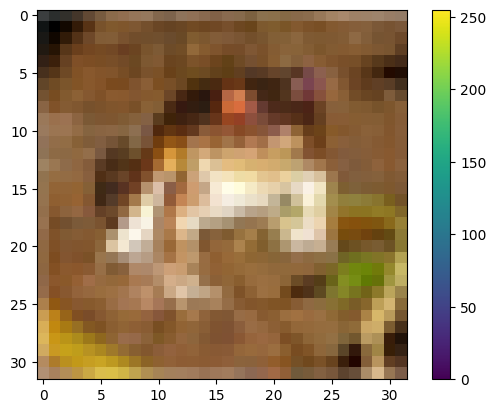

In [ ]:
plt.figure()
plt.imshow(train_images_aug[0])
plt.colorbar()
plt.grid(False)
plt.show()


In [ ]:
train_images_aug= train_images_aug / 255.0
test_images= test_images / 255.0
train_labels_aug.shape


(116010, 1)

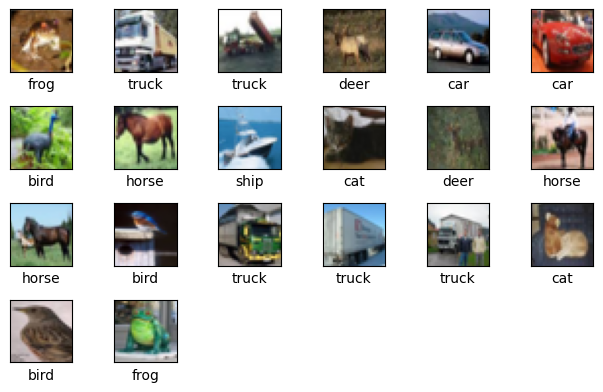

In [ ]:
plt.figure()
for i in range(20):
  plt.subplot (5, 6, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images_aug[i])
  plt.xlabel(class_names[train_labels_aug[i][0]])
plt.tight_layout()
plt.show()

In [ ]:
model = tf.keras.Sequential([
    #tf.keras.layers.RandomFlip("horizontal", input_shape=(32,32,3)),
    tf.keras.layers.Conv2D(32, (3,3),kernel_regularizer=tf.keras.regularizers.l2(0.001),input_shape=(32,32,3)),
    #tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.MaxPooling2D((2,2)),

    tf.keras.layers.Conv2D(64, (3,3),kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    #tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.MaxPooling2D((2,2)),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(32, kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    #tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(10)
])


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(optimizer='adam',
              loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics = ['accuracy'])

In [ ]:
model.fit(train_images_aug, train_labels_aug, epochs = 7)

Epoch 1/7
3626/3626 ━━━━━━━━━━━━━━━━━━━━ 19s 4ms/step - accuracy: 0.3795 - loss: 1.7350
Epoch 2/7
3626/3626 ━━━━━━━━━━━━━━━━━━━━ 16s 3ms/step - accuracy: 0.5669 - loss: 1.3093
Epoch 3/7
3626/3626 ━━━━━━━━━━━━━━━━━━━━ 13s 3ms/step - accuracy: 0.6087 - loss: 1.2097
Epoch 4/7
3626/3626 ━━━━━━━━━━━━━━━━━━━━ 20s 3ms/step - accuracy: 0.6305 - loss: 1.1593
Epoch 5/7
3626/3626 ━━━━━━━━━━━━━━━━━━━━ 21s 3ms/step - accuracy: 0.6489 - loss: 1.1206
Epoch 6/7
3626/3626 ━━━━━━━━━━━━━━━━━━━━ 13s 3ms/step - accuracy: 0.6605 - loss: 1.0963
Epoch 7/7
3626/3626 ━━━━━━━━━━━━━━━━━━━━ 20s 3ms/step - accuracy: 0.6680 - loss: 1.0758


In [ ]:
test_loss, test_accuaracy = model.evaluate(test_images, test_labels, verbose=2)
print("Test accuracy: ", test_accuaracy*100)

376/376 - 2s - 5ms/step - accuracy: 0.6979 - loss: 0.9961
Test accuracy:  69.7912335395813


In [ ]:
model_probability = tf.keras.Sequential([model,
                                         tf.keras.layers.Softmax()])
predictions = model_probability.predict(test_images)
predictions[0]


376/376 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


array([2.8696312e-03, 5.1134435e-04, 4.6393750e-03, 6.9319457e-01,
       3.2880406e-03, 1.9737275e-01, 4.2181168e-02, 1.0008229e-03,
       5.2903514e-02, 2.0388667e-03], dtype=float32)

In [ ]:
print(np.argmax(predictions[0]))
print(class_names[3])

In [ ]:
def plot_image(i, predictions_array, true_label, img):
  #true_label, img = true_label[i][0], img[i][0]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  #true_label = true_label[i][0]
  plt.grid(False)
  plt.xticks(range(10))
  #plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')
  plt.xlabel('Class index')
  plt.ylabel('Prediction Probabilities')
  plt.tight_layout()

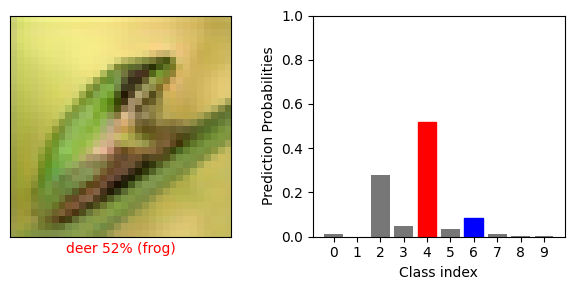

In [ ]:
i = 112
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels[i][0], test_images[i])
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels[i][0])
plt.show()

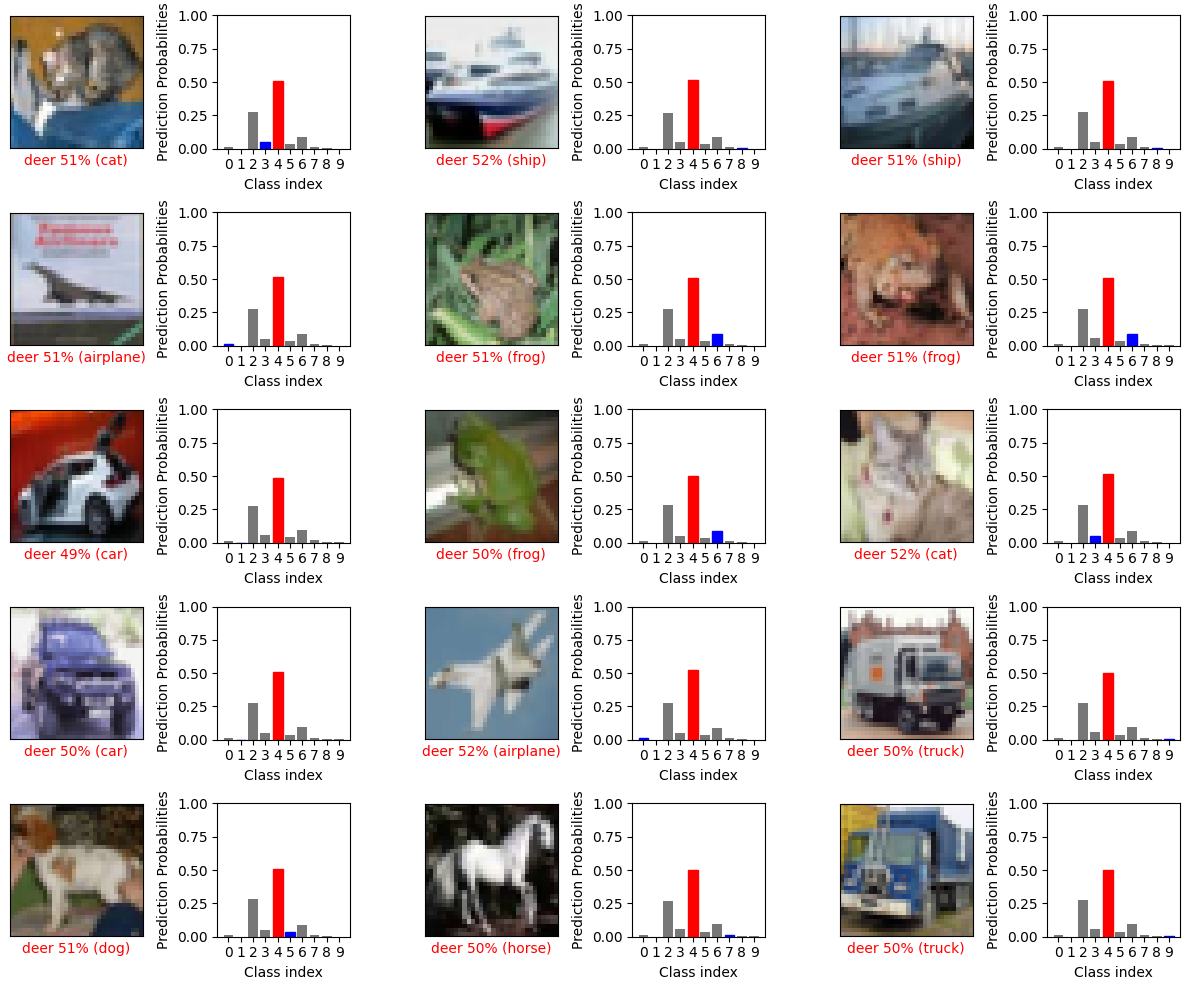

In [ ]:
#num_rows = 5
#num_cols = 3
num_images = 15
plt.figure(figsize=(2*2*3, 2*5))
for i in range(num_images):
  plt.subplot(5, 6, 2*i+1)
  plot_image(i, predictions[i], test_labels[i][0], test_images[i])
  plt.subplot(5, 6, 2*i+2)
  plot_value_array(i, predictions[i], test_labels[i][0])
plt.tight_layout()
plt.show()

In [ ]:
dog_indices = np.where(test_labels.flatten() == 5)[0]

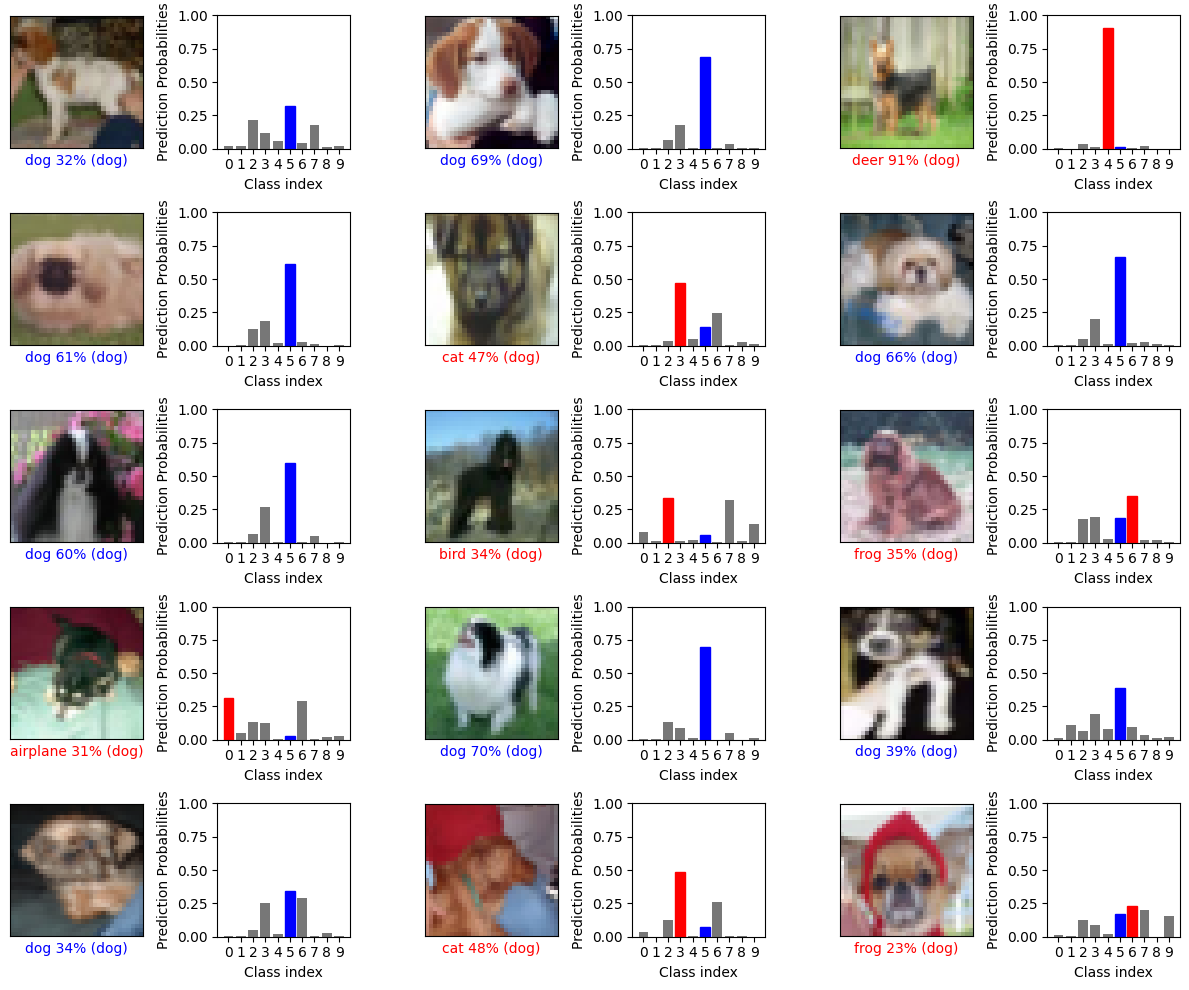

In [ ]:
num_images = 15
plt.figure(figsize=(2*2*3, 2*5))

for idx, i in enumerate(dog_indices[:num_images]):
    plt.subplot(5, 6, 2*idx+1)
    plot_image(i, predictions[i], test_labels[i][0], test_images[i])
    plt.subplot(5, 6, 2*idx+2)
    plot_value_array(i, predictions[i], test_labels[i][0])

plt.tight_layout()
plt.show()
